![lop](../../images/logo_diive1_128px.png)

<span style='font-size:32px; display:block;'>
<b>
    Format EddyPro _fluxnet_ output files for upload to FLUXNET database
</b>
</span>

---
**Notebook version**: `4` (27 Feb 2024)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)  

</br>

# **Background**

- Eddypro outputs `_fluxnet_` files
- The files cannot be directly uploaded to the FLUXNET database
- The class `FormatEddyProFluxnetFileForUpload` helps in formatting the files to comply with FLUXNET requirements for data sharing

More info:
- [FLUXNET Requirements for Data Sharing](https://www.swissfluxnet.ethz.ch/index.php/knowledge-base/fluxnet-requirements/)
- [Data submission - General Information](http://www.europe-fluxdata.eu/home/guidelines/how-to-submit-data/general-information)
- [FLUXNET Variables codes](http://www.europe-fluxdata.eu/home/guidelines/how-to-submit-data/variables-codes)

</br>

# **Imports**

In [3]:
import importlib.metadata
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from diive.pkgs.formats.fluxnet import FormatEddyProFluxnetFileForUpload  # Class to format output files for upload
from diive.core.plotting.heatmap_datetime import HeatmapDateTime  # For plotting heatmaps
from diive.core.plotting.timeseries import TimeSeries  # For simple (interactive) time series plotting
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.74.0


</br>

# **Docstring**

In [4]:
help(FormatEddyProFluxnetFileForUpload)

Help on class FormatEddyProFluxnetFileForUpload in module diive.pkgs.formats.fluxnet:

class FormatEddyProFluxnetFileForUpload(builtins.object)
 |  FormatEddyProFluxnetFileForUpload(site: str, sourcedir: str, outdir: str, add_runid: bool = True)
 |  
 |  Helper class to convert EddyPro _fluxnet_ output files to the file
 |  format required for data upload (data sharing) to FLUXNET
 |  
 |  The class does the following:
 |  - Search source folder for _fluxnet_ files
 |  - Load data from all found files and store in dataframe
 |  - Make subset that contains required variables
 |  - Set missing values to FLUXNET format (-9999)
 |  - Rename variables by adding the FLUXNET suffix (_1_1_1)
 |  - Insert two timestamp columns denoting START and END of averaging interval
 |  - Format the two timestamp columns to FLUXNET format YYYYMMDDhhmm
 |  - Save data from dataframe to yearly files
 |  
 |  - Example notebook available in:
 |      notebooks/Formats/ConvertEddyProFluxnetFileForUpload.ipynb
 

</br>

# **Input and output folders**

In [5]:
SOURCE = r"F:\Sync\luhk_work\TMP\FRU"  # This is the folder where datafiles are searched
OUTDIR = r"F:\Sync\luhk_work\TMP\FRU"  # Output yearly CSV to this folder

</br>

# **Format data**

## Initialize

In [6]:
fxn = FormatEddyProFluxnetFileForUpload(
    site='CH-FRU',
    sourcedir=SOURCE,
    outdir=OUTDIR,    
    add_runid=True)


Initiated formatting for datafiles with the following settings:
    site: CH-FRU
    source folder: F:\Sync\luhk_work\TMP\FRU
    output folder: F:\Sync\luhk_work\TMP\FRU
    add run ID: True


## Search and merge `_fluxnet_` datafiles

In [7]:
fxn.mergefiles(limit_n_files=None)


Searching for EDDYPRO-FLUXNET-CSV-30MIN files with extension .csv andID _fluxnet_ in folder F:\Sync\luhk_work\TMP\FRU ...
    Found 3 files:
   --> F:\Sync\luhk_work\TMP\FRU\2020_eddypro_CH-FRU_FR-20230425-205325_fluxnet_2023-04-26T220030_adv.csv
   --> F:\Sync\luhk_work\TMP\FRU\2021_eddypro_CH-FRU_FR-20230425-205131_fluxnet_2023-04-26T214014_adv.csv
   --> F:\Sync\luhk_work\TMP\FRU\2022_eddypro_CH-FRU_FR-20230425-205042_fluxnet_2023-04-26T222351_adv.csv
Reading file 2020_eddypro_CH-FRU_FR-20230425-205325_fluxnet_2023-04-26T220030_adv.csv ...
Reading file 2021_eddypro_CH-FRU_FR-20230425-205131_fluxnet_2023-04-26T214014_adv.csv ...
Reading file 2022_eddypro_CH-FRU_FR-20230425-205042_fluxnet_2023-04-26T222351_adv.csv ...


## Merged dataset

In [8]:
fxn.merged_df

,AIR_MV,AIR_DENSITY,AIR_RHO_CP,AIR_CP,AOA_METHOD,AXES_ROTATION_METHOD,...,W_ITC,W_ITC_TEST,WBOOST_APPLIED,WPL_APPLIED,ZL,ZL_UNCORR
TIMESTAMP_MIDDLE,,,,,,,,,,,,,
2019-12-31 19:15:00,0.024907,1.16085,1169.83,1007.74,0.0,1.0,...,6.0,1.0,0.0,1.0,3.079130,3.006370
2019-12-31 19:45:00,0.024865,1.16271,1171.77,1007.79,0.0,1.0,...,47.0,3.0,0.0,1.0,-0.096300,-0.099549
2019-12-31 20:15:00,0.024910,1.16061,1169.68,1007.81,0.0,1.0,...,27.0,2.0,0.0,1.0,-0.780695,-0.771121
2019-12-31 20:45:00,0.024886,1.16183,1170.78,1007.70,0.0,1.0,...,21.0,2.0,0.0,1.0,0.540130,0.545173
2019-12-31 21:15:00,0.024874,1.16239,1171.37,1007.73,0.0,1.0,...,9.0,1.0,0.0,1.0,-0.135396,-0.095764
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 22:45:00,0.025906,1.11442,1125.59,1010.02,0.0,1.0,...,9.0,1.0,0.0,1.0,0.316949,0.309181
2022-12-31 23:15:00,0.025770,1.12033,1131.50,1009.97,0.0,1.0,...,60.0,4.0,0.0,1.0,-0.057874,-0.056127
2022-12-31 23:45:00,0.025757,1.12077,1132.08,1010.09,0.0,1.0,...,8.0,1.0,0.0,1.0,1.716370,1.677440


## Test for signal strength / AGC

<div class="alert alert-block alert-danger">
    <b>Do not use for H (sensible heat flux).</b> This test is only relevant for fluxes where the concentration was measured by a gas analyzer, e.g. FC, FH2O, LE, ET, N2O, CH4, etc ... 
</div>

In [9]:
FLUXCOLS = ['FC', 'LE']  # Give flux columns as list
SIGNAL_STRENGTH_COL = 'CUSTOM_AGC_MEAN'  # Name of the column storing the signal strength, typically 'CUSTOM_AGC_MEAN' for LI-7500, 'CUSTOM_SIGNAL_STRENGTH_IRGA72_MEAN' for LI-7200, or something similar
SIGNAL_STRENGTH_THRESHOLD = 90  # Signal strength threshold, flux values where threshold is exceeded are flagged as rejected
SIGNAL_STRENGTH_METHOD = 'discard above'  # 'discard above' flags fluxes where signal strength > threshold, 'discard below' where signal strength < threshold

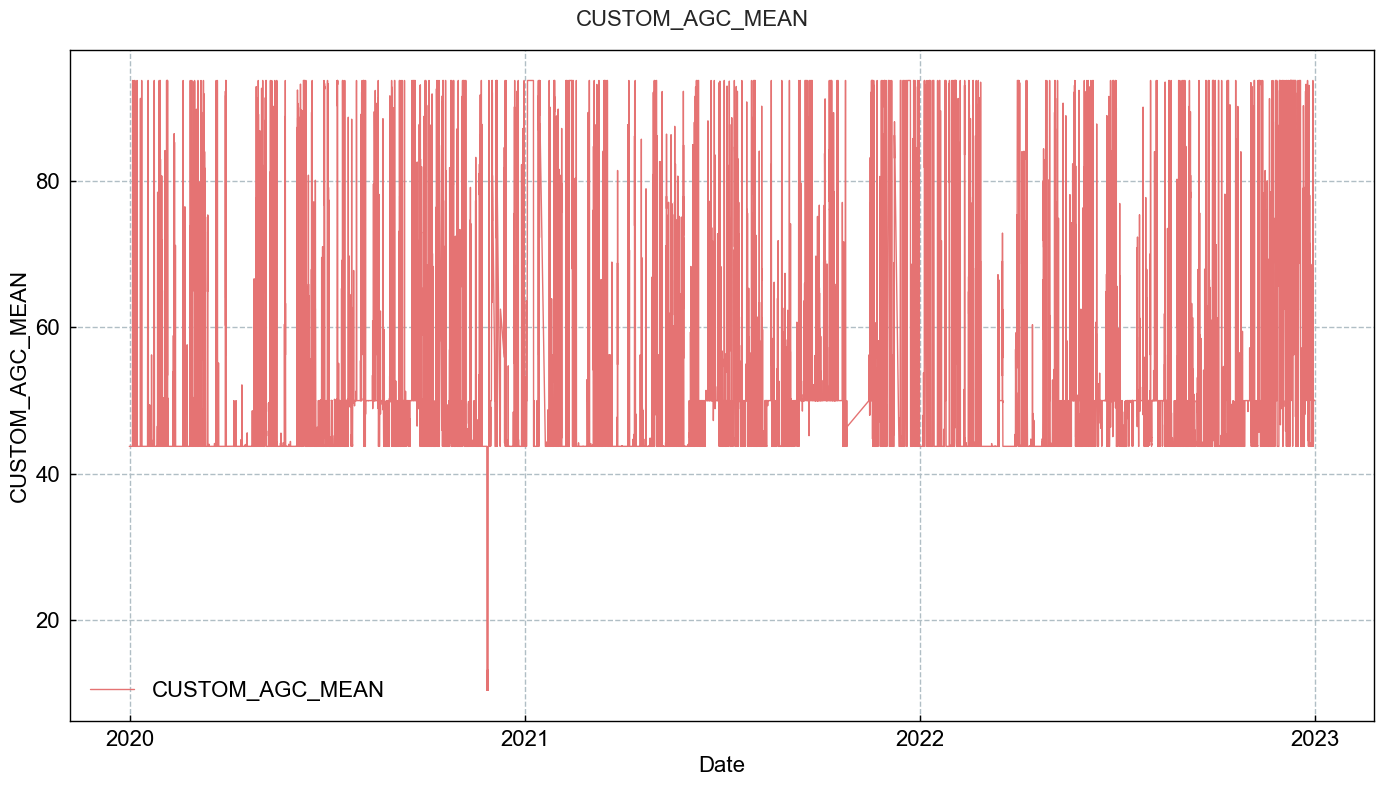

In [10]:
# TimeSeries(series=fxn.merged_df[SIGNAL_STRENGTH_COL]).plot_interactive()
TimeSeries(series=fxn.merged_df[SIGNAL_STRENGTH_COL]).plot()

In [11]:
for f in FLUXCOLS:
    fxn.remove_low_signal_data(fluxcol=f,
                               signal_strength_col=SIGNAL_STRENGTH_COL,
                               method=SIGNAL_STRENGTH_METHOD,
                               threshold=SIGNAL_STRENGTH_THRESHOLD)



Removing FC flux values where signal strength / AGC is not sufficient:

Performing signal strength / AGC quality check ...

SIGNAL STRENGTH TEST: Generating new flag variable FLAG_L2_FC_SIGNAL_STRENGTH_TEST, newly calculated from output variable CUSTOM_AGC_MEAN, with flag 0 (good values) where CUSTOM_AGC_MEAN <= 90, flag 2 (bad values) where CUSTOM_AGC_MEAN > 90 ...
CUSTOM_AGC_MEAN rejected 2953 values of FC, all rejected value were removed from the dataset.

Available values of FC before removing low signal fluxes: 46335
Available values of FC after removing low signal fluxes: 44603

Removing all newly generated columns relating to quality check (not needed for FLUXNET), restoring original set of variables ...


Removing LE flux values where signal strength / AGC is not sufficient:

Performing signal strength / AGC quality check ...

SIGNAL STRENGTH TEST: Generating new flag variable FLAG_L2_LE_SIGNAL_STRENGTH_TEST, newly calculated from output variable CUSTOM_AGC_MEAN, with flag 0 

## Remove problematic time periods
               
Use `REMOVE_DATES` to specify the time period(s) for `VAR` that are removed from the dataset.

For example:

```python
REMOVE_DATES = ['2022-06-30 23:58:30',
                ['2022-06-05 00:00:30', '2022-06-07 14:30:00']]
```
will remove the record for `2022-06-30 23:58:30` and all records between
`2022-06-05 00:00:30` (inclusive) and `2022-06-07 14:30:00` (inclusive).

This also works when providing only the date, e.g.
```python
REMOVE_DATES = [['2006-05-01', '2006-07-18']] 
```
will remove all data points between `2006-05-01` (inclusive) and `2006-07-18` (inclusive).

### Plot affected variables

In [12]:
# VAR = ['FC', 'LE', 'H', 'USTAR', 'FETCH_70', 'FETCH_90', 'FETCH_MAX']
# for v in VAR:
#     # TimeSeries(series=fxn.merged_df[v]).plot_interactive()
#     TimeSeries(series=fxn.merged_df[v]).plot()

In [13]:
# # These variables are erroneous during the defined time period
# VAR = ['FC', 'LE', 'H', 'USTAR', 'FETCH_70', 'FETCH_90', 'FETCH_MAX']  
# REMOVE_DATES = [
#     ['2023-03-20', '2023-07-09']
# ]

In [14]:
# for v in VAR:
#     fxn.remove_erroneous_data(var=v,
#                               remove_dates=REMOVE_DATES,
#                               showplot=True)

In [15]:
# # These variables are erroneous during the defined time period
# VAR = ['FC', 'LE']  
# REMOVE_DATES = [    
#     ['2017-06-09 00:30', '2017-06-12 11:00'],
#     ['2017-06-12 18:00', '2017-06-16 11:00']
# ]

In [16]:
# for v in VAR:
#     fxn.remove_erroneous_data(var=v,
#                               remove_dates=REMOVE_DATES,
#                               showplot=True)

## Format data for FLUXNET

In [17]:
fxn.apply_fluxnet_format()


Assembling subset of variables ...
    Found: ['FC', 'FC_SSITC_TEST', 'SC_SINGLE', 'CO2', 'LE', 'LE_SSITC_TEST', 'SLE_SINGLE', 'H2O', 'H', 'H_SSITC_TEST', 'SH_SINGLE', 'USTAR', 'WD', 'WS', 'FETCH_70', 'FETCH_90', 'FETCH_MAX', 'SW_IN_1_1_1', 'TA_1_1_1', 'RH_1_1_1', 'PA_1_1_1', 'LW_IN_1_1_1', 'PPFD_IN_1_1_1']
    Not found: ['G_1_1_1', 'NETRAD_1_1_1', 'TS_1_1_1', 'P_1_1_1', 'SWC_1_1_1']

Setting all missing values to -9999 ...

The following variables are renamed to comply with FLUXNET variable codes:
    RENAMED --> SC_SINGLE was renamed to SC
    RENAMED --> SLE_SINGLE was renamed to SLE
    RENAMED --> SH_SINGLE was renamed to SH

The following variables have been renamed:
    RENAMED --> FC was renamed to FC_1_1_1
    RENAMED --> FC_SSITC_TEST was renamed to FC_SSITC_TEST_1_1_1
    RENAMED --> SC was renamed to SC_1_1_1
    RENAMED --> CO2 was renamed to CO2_1_1_1
    RENAMED --> LE was renamed to LE_1_1_1
    RENAMED --> LE_SSITC_TEST was renamed to LE_SSITC_TEST_1_1_1
    RENAMED 

## Save yearly `CSV` files

In [18]:
fxn.export_yearly_files()


Saving yearly CSV files ...
    --> Saved file F:\Sync\luhk_work\TMP\FRU\CH-FRU_2019_fluxes_meteo_20240420.csv.
    --> Saved file F:\Sync\luhk_work\TMP\FRU\CH-FRU_2020_fluxes_meteo_20240420.csv.
    --> Saved file F:\Sync\luhk_work\TMP\FRU\CH-FRU_2021_fluxes_meteo_20240420.csv.
    --> Saved file F:\Sync\luhk_work\TMP\FRU\CH-FRU_2022_fluxes_meteo_20240420.csv.
    --> Saved file F:\Sync\luhk_work\TMP\FRU\CH-FRU_2023_fluxes_meteo_20240420.csv.


</br>

# **Check FLUXNET data**

- The merged file data from all files can be directly returned with `.get_data()`
- Note that the dataframe below does not show exactly how the data look like in the formatted data files, but how data were stored in `diive`, hence the timestamp index `TIMESTAMP_MIDDLE`
- The yearly files do not contain the timestamp index `TIMESTAMP_MIDDLE`

## Dataframe that was used to generate yearly files

In [19]:
data_fluxnet = fxn.get_data()
data_fluxnet

,TIMESTAMP_START,TIMESTAMP_END,FC_1_1_1,FC_SSITC_TEST_1_1_1,SC_1_1_1,CO2_1_1_1,...,SW_IN_1_1_1,TA_1_1_1,RH_1_1_1,PA_1_1_1,LW_IN_1_1_1,PPFD_IN_1_1_1
TIMESTAMP_MIDDLE,,,,,,,,,,,,,
2019-12-31 19:15:00,201912311900,201912311930,0.738373,0.0,-9999.000000,410.400,...,0.000000,2.11313,61.4129,-9999.0,232.224,0.0
2019-12-31 19:45:00,201912311930,201912312000,-3.135800,1.0,0.044745,411.185,...,0.003059,1.67502,64.8909,-9999.0,233.269,0.0
2019-12-31 20:15:00,201912312000,201912312030,-2.667060,0.0,-0.076706,409.837,...,0.054170,2.15824,62.9828,-9999.0,233.337,0.0
2019-12-31 20:45:00,201912312030,201912312100,1.086530,0.0,0.018797,410.167,...,0.000000,1.92971,61.3778,-9999.0,232.412,0.0
2019-12-31 21:15:00,201912312100,201912312130,-2.341840,1.0,-0.079972,408.763,...,0.000000,1.75516,62.6160,-9999.0,232.955,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 22:45:00,202212312230,202212312300,1.210100,0.0,0.069432,421.579,...,0.000000,10.40080,62.5504,-9999.0,278.846,0.0
2022-12-31 23:15:00,202212312300,202212312330,-1.503480,2.0,0.029350,422.113,...,0.000000,8.92672,68.8316,-9999.0,271.380,0.0
2022-12-31 23:45:00,202212312330,202301010000,4.104030,0.0,-0.038788,421.408,...,0.000000,8.97778,70.3356,-9999.0,277.935,0.0


In [20]:
data_fluxnet.columns.to_list()

['TIMESTAMP_START',
 'TIMESTAMP_END',
 'FC_1_1_1',
 'FC_SSITC_TEST_1_1_1',
 'SC_1_1_1',
 'CO2_1_1_1',
 'LE_1_1_1',
 'LE_SSITC_TEST_1_1_1',
 'SLE_1_1_1',
 'H2O_1_1_1',
 'H_1_1_1',
 'H_SSITC_TEST_1_1_1',
 'SH_1_1_1',
 'USTAR_1_1_1',
 'WD_1_1_1',
 'WS_1_1_1',
 'FETCH_70_1_1_1',
 'FETCH_90_1_1_1',
 'FETCH_MAX_1_1_1',
 'SW_IN_1_1_1',
 'TA_1_1_1',
 'RH_1_1_1',
 'PA_1_1_1',
 'LW_IN_1_1_1',
 'PPFD_IN_1_1_1']

## Overview of variables and some stats

In [21]:
# print(*data_fluxnet.columns, sep = "\n")
data_fluxnet.describe().T

,count,mean,std,min,25%,50%,75%,max
FC_1_1_1,52620.0,-1525.407608,3592.546492,-9999.0,-15.151350,-2.348020,1.715800,595.24000
FC_SSITC_TEST_1_1_1,52620.0,-1193.755796,3242.974978,-9999.0,0.000000,0.000000,1.000000,2.00000
SC_1_1_1,52620.0,-1406.394723,3476.272017,-9999.0,-0.304686,-0.023353,0.062245,18.00230
CO2_1_1_1,52620.0,-813.588858,3383.414347,-9999.0,403.621500,414.821500,425.502000,896.01500
LE_1_1_1,52620.0,-1738.948116,3845.007689,-9999.0,-8.349733,4.132740,53.688000,1891.26000
LE_SSITC_TEST_1_1_1,52620.0,-1619.409179,3684.507680,-9999.0,0.000000,0.000000,1.000000,2.00000
SLE_1_1_1,52620.0,-251.198982,1911.463480,-24134.3,-0.501269,-0.028998,0.429656,32708.10000
H2O_1_1_1,52620.0,-1604.598572,3682.235342,-9999.0,4.937600,8.396985,13.629200,26.33150
H_1_1_1,52620.0,-223.434640,1507.555232,-9999.0,-10.246650,0.164415,16.929850,3734.95000
H_SSITC_TEST_1_1_1,52620.0,-231.188940,1504.872770,-9999.0,0.000000,0.000000,1.000000,2.00000


## Plot some key variables
- Keep in mind that FLUXNET requires missing values as `-9999` when looking at the plots

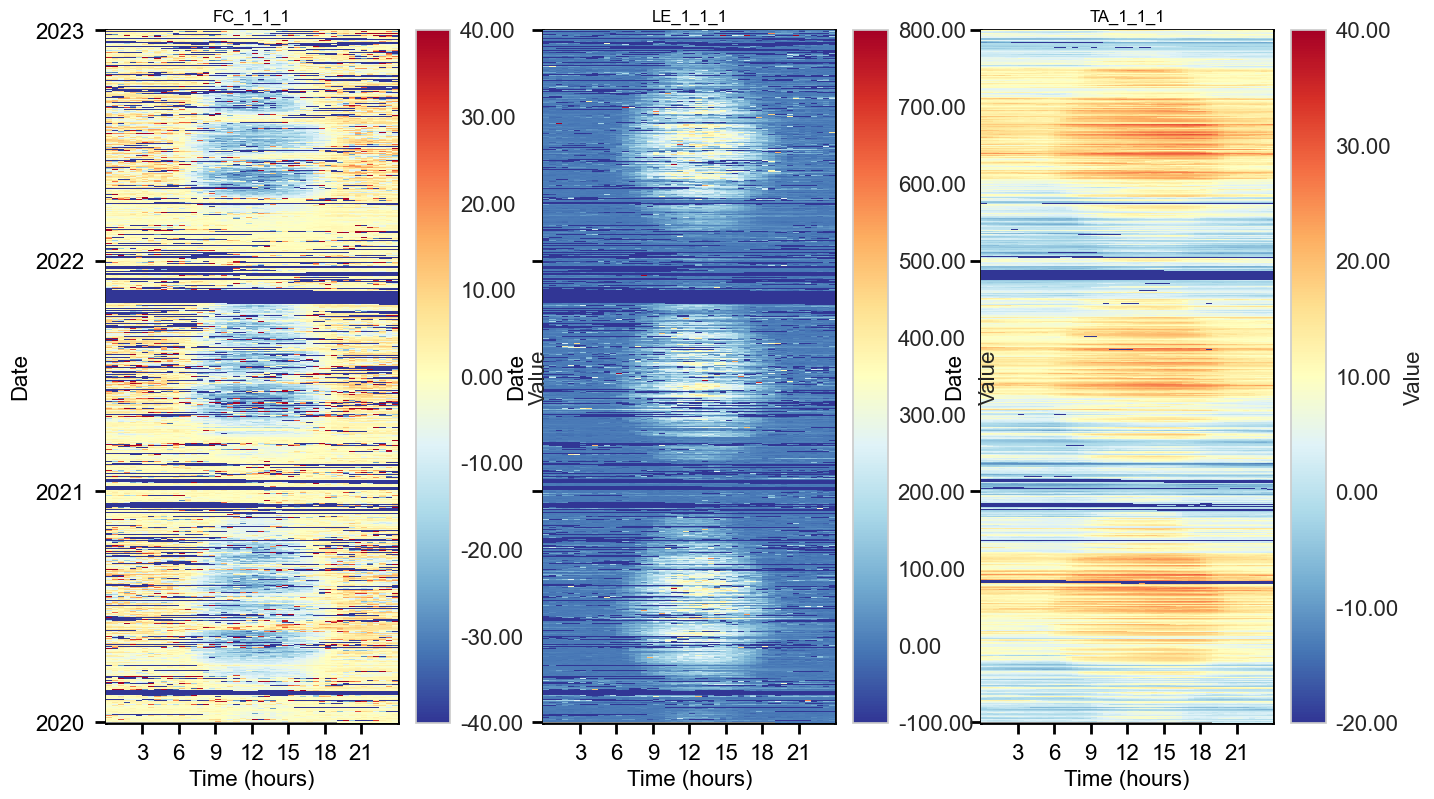

In [22]:
fig = plt.figure(facecolor='white', figsize=(16, 9))
gs = gridspec.GridSpec(1, 3)  # rows, cols
ax_fc = fig.add_subplot(gs[0, 0])
ax_le = fig.add_subplot(gs[0, 1])
ax_ta = fig.add_subplot(gs[0, 2])
HeatmapDateTime(ax=ax_fc, series=data_fluxnet['FC_1_1_1'], vmin=-40, vmax=40).plot()
HeatmapDateTime(ax=ax_le, series=data_fluxnet['LE_1_1_1'], vmin=-100, vmax=800).plot()
HeatmapDateTime(ax=ax_ta, series=data_fluxnet['TA_1_1_1'], vmin=-20, vmax=40).plot()
ax_fc.set_title("FC_1_1_1", color='black')
ax_le.set_title("LE_1_1_1", color='black')
ax_ta.set_title("TA_1_1_1", color='black')
ax_le.tick_params(left=True, right=False, top=False, bottom=True,
                     labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax_ta.tick_params(left=True, right=False, top=False, bottom=True,
                     labelleft=False, labelright=False, labeltop=False, labelbottom=True)

## Plot all variables

C:\Users\holukas\AppData\Local\Temp\ipykernel_9756\1853307846.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(facecolor='white', figsize=(4, 8))


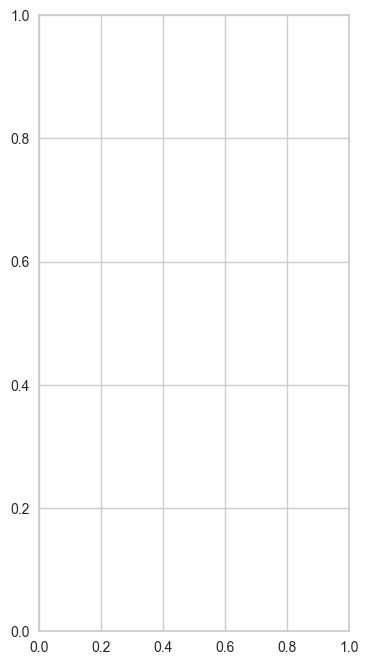

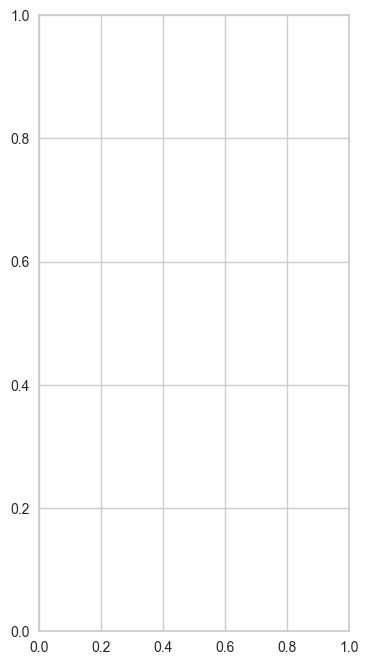

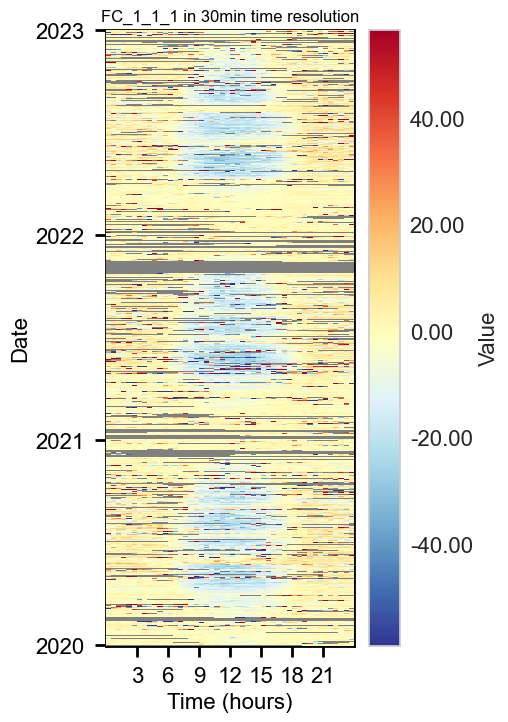

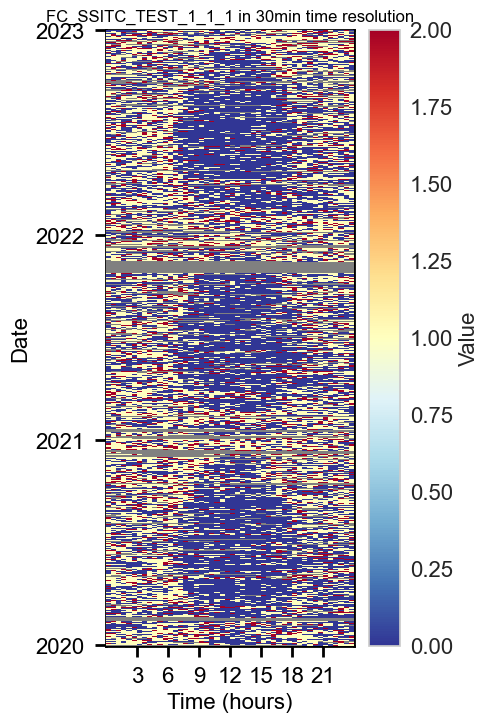

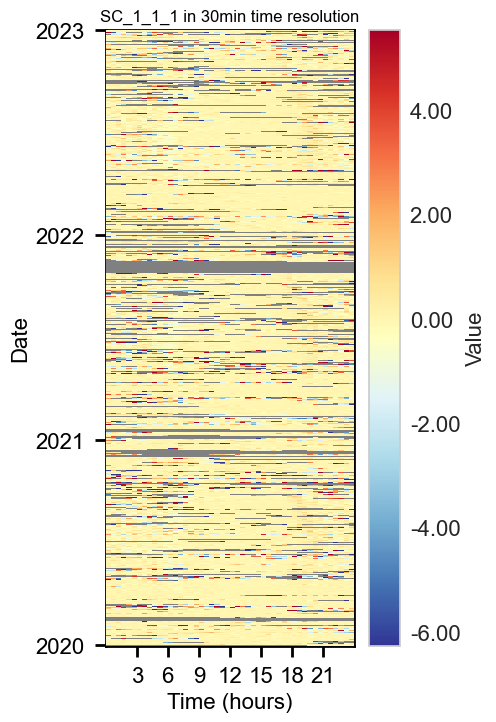

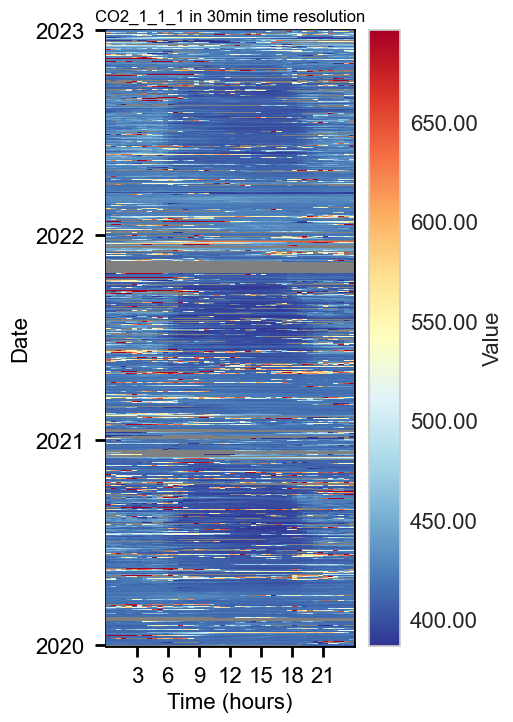

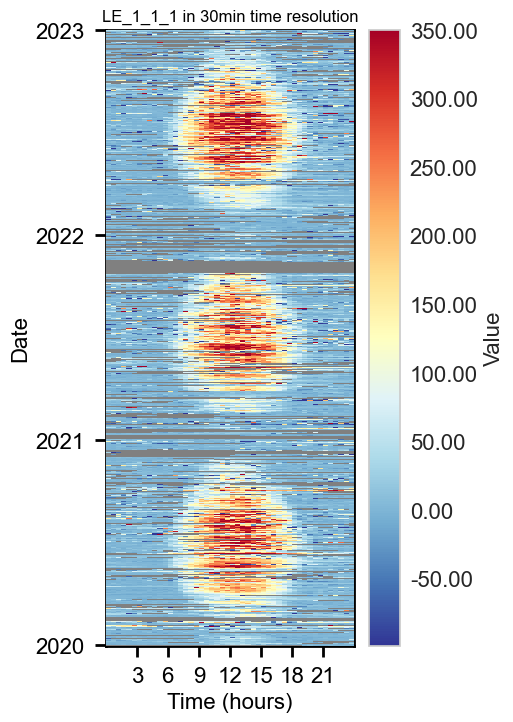

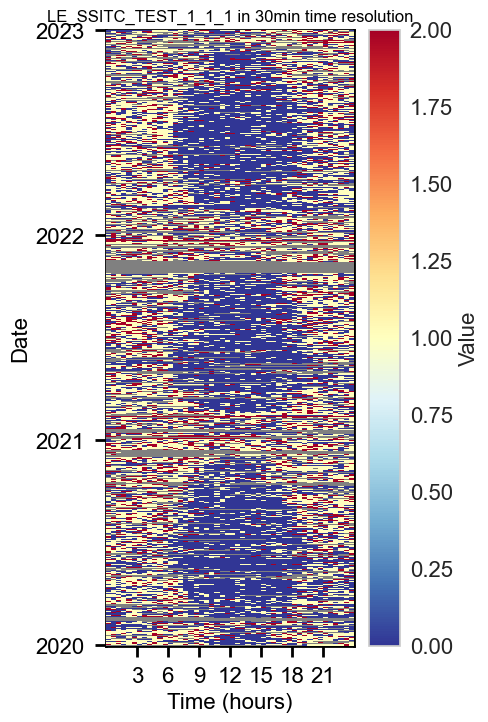

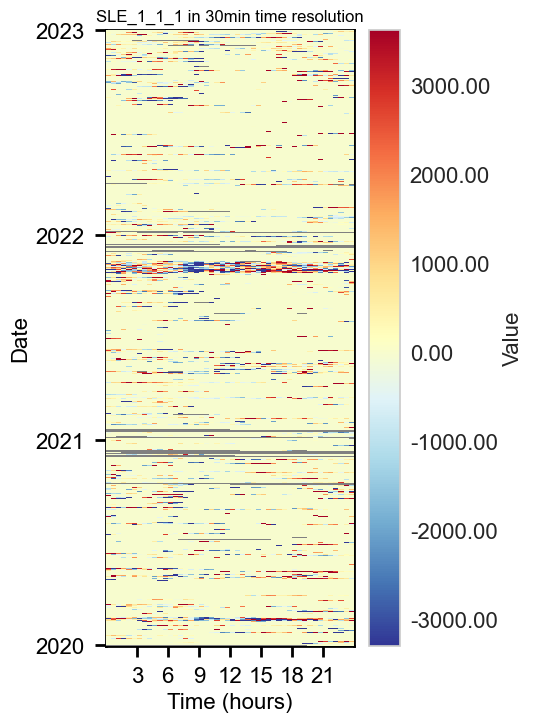

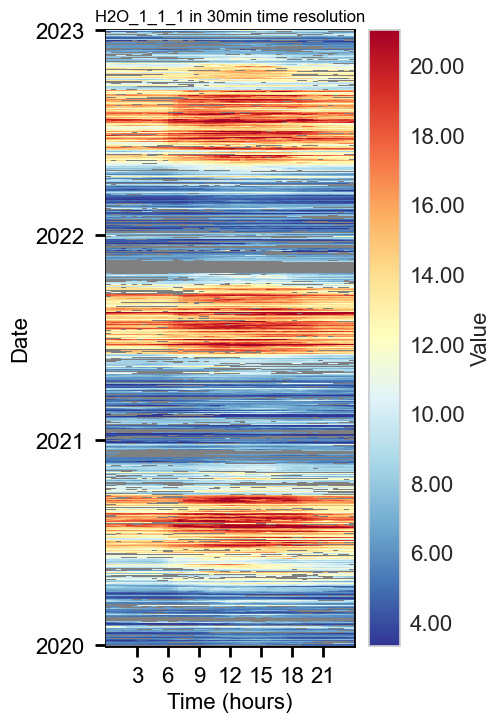

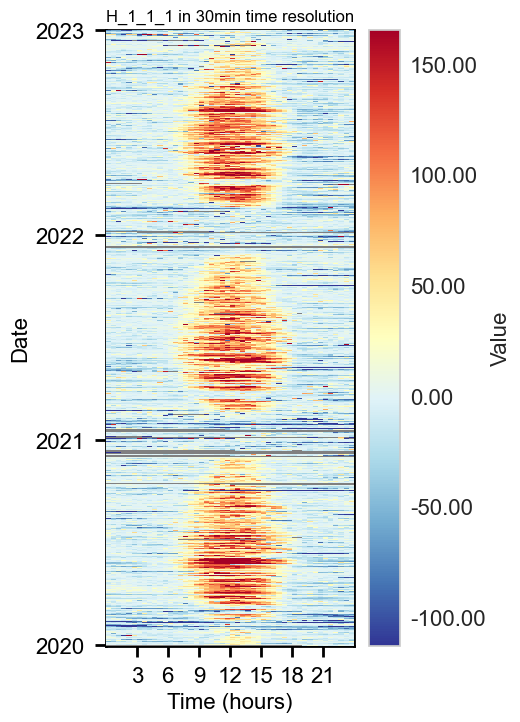

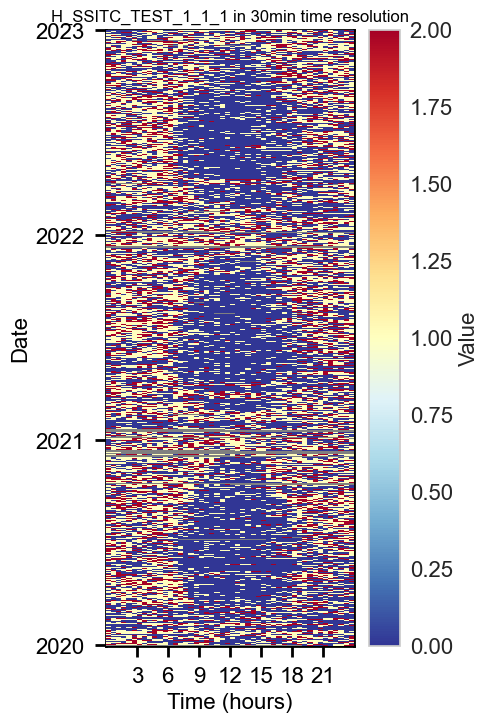

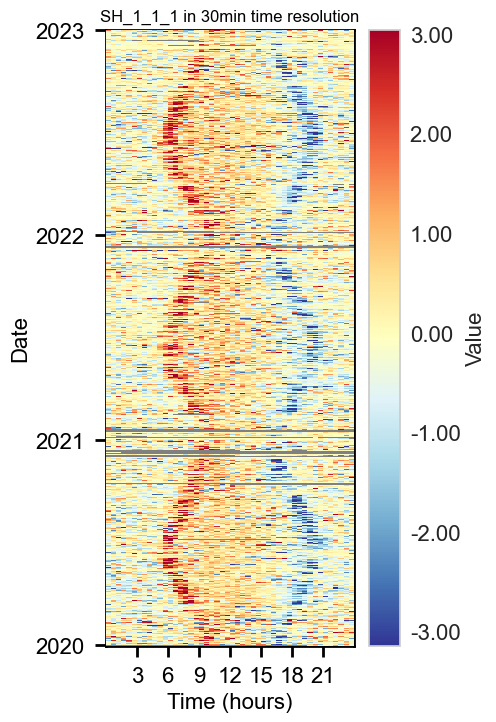

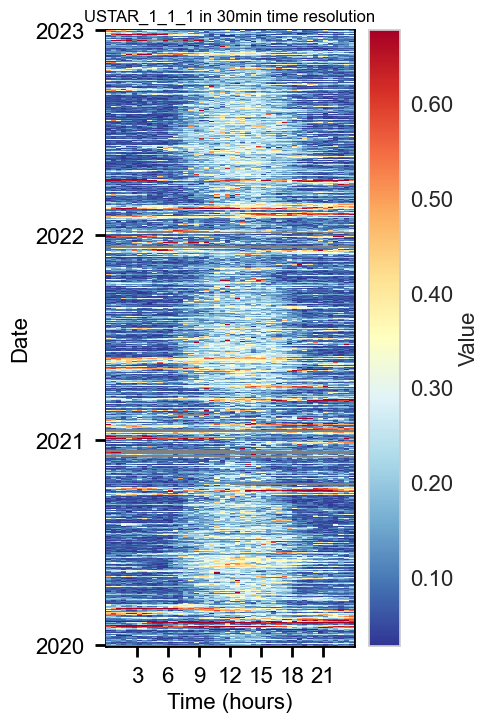

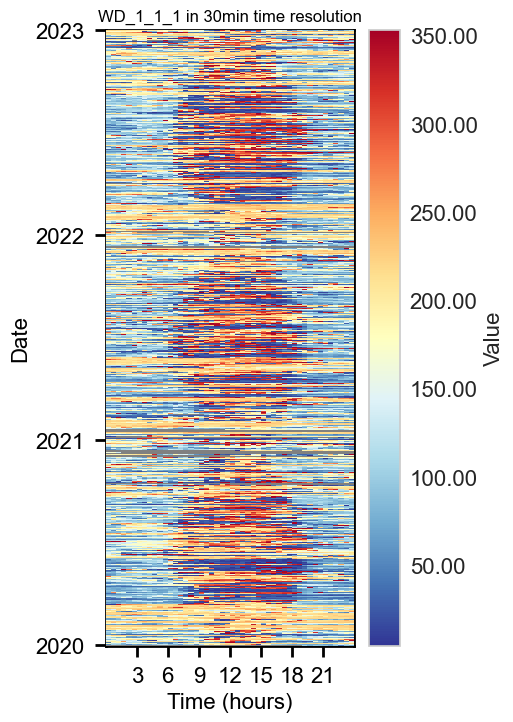

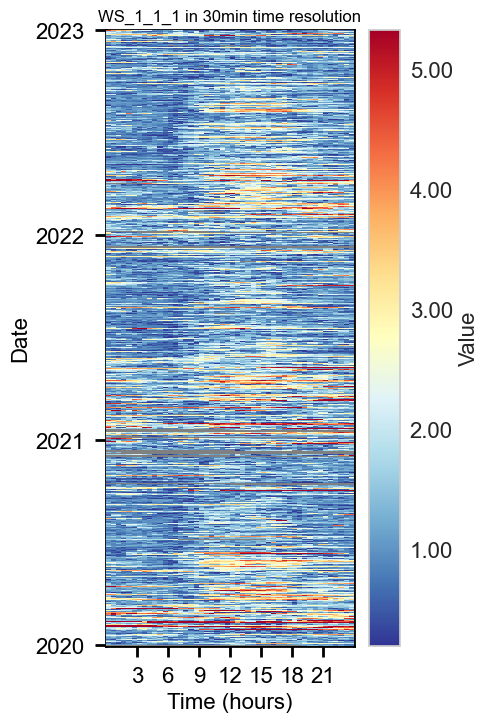

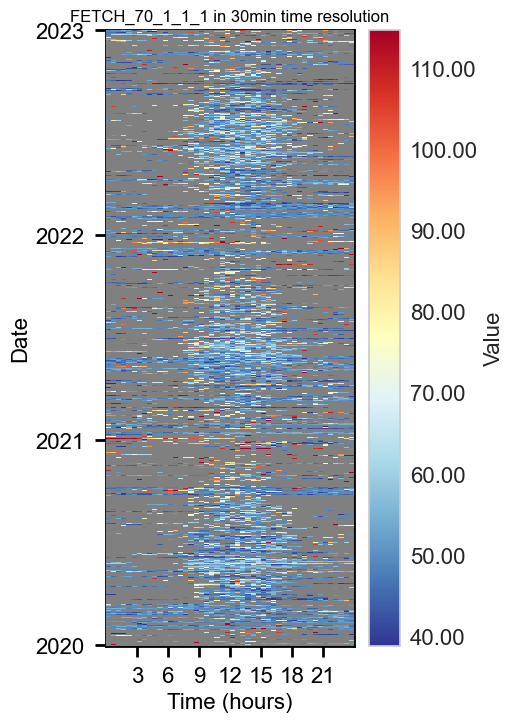

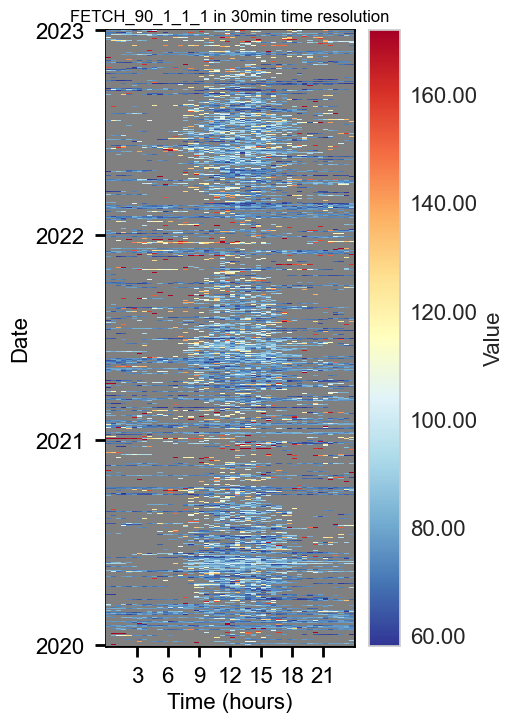

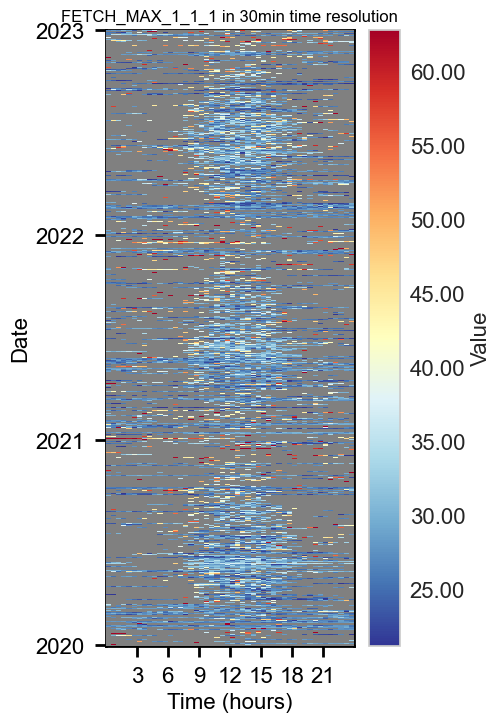

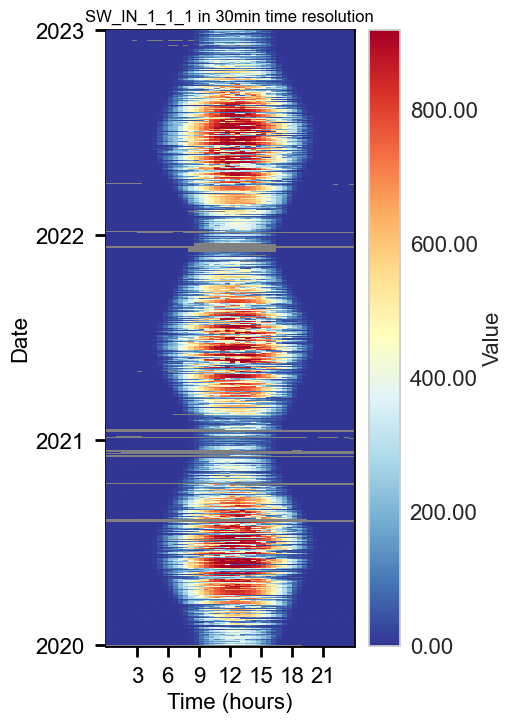

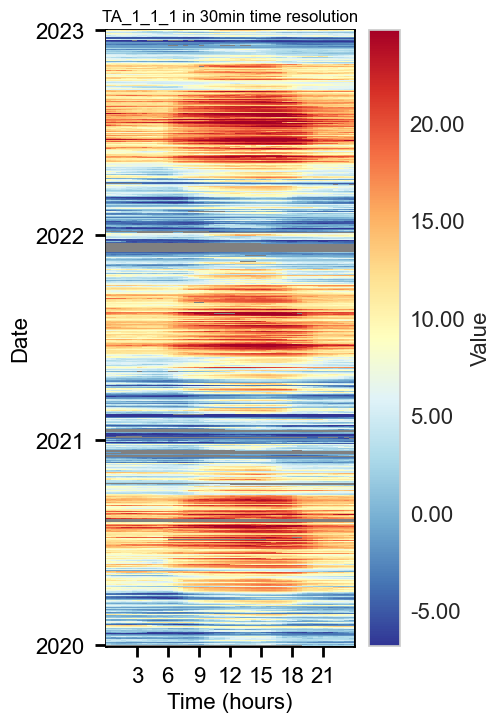

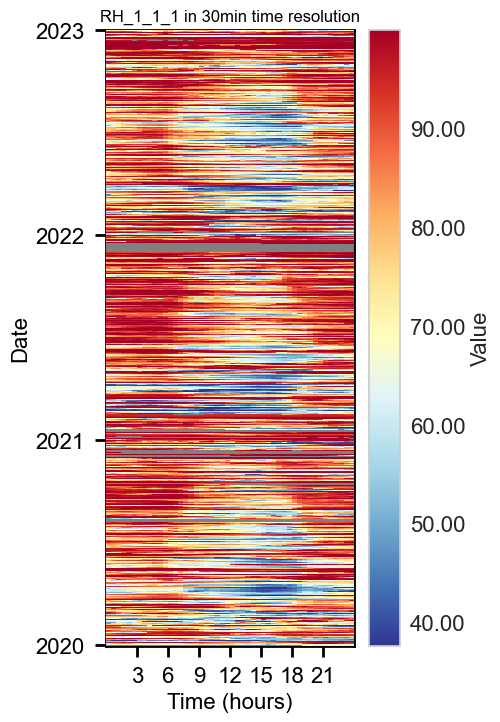

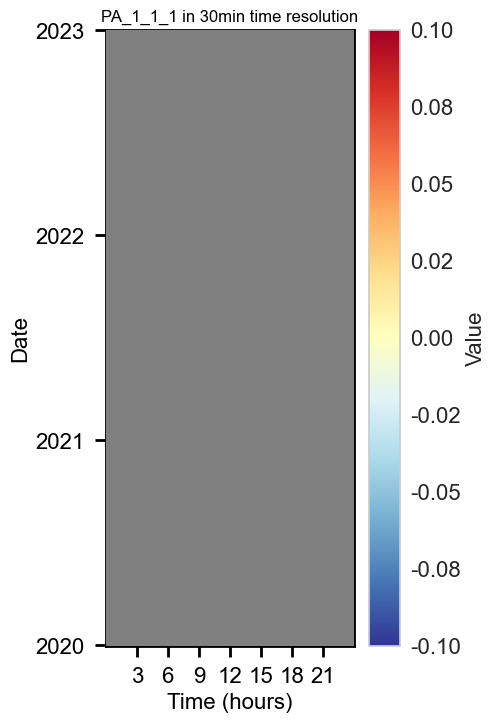

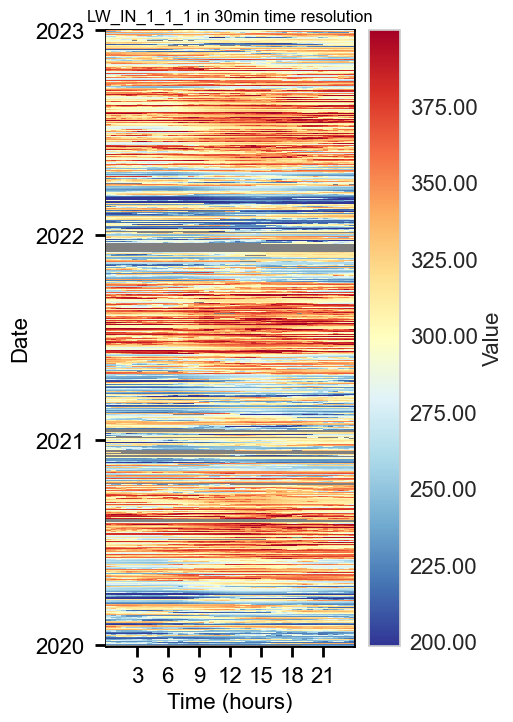

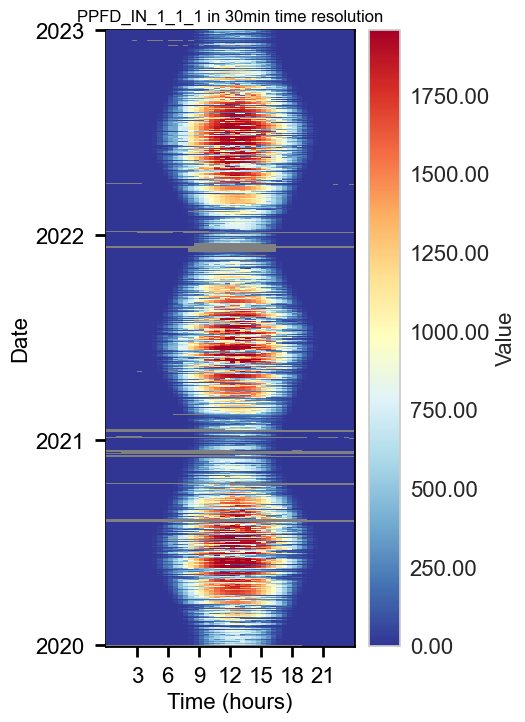

In [23]:
for col in data_fluxnet.columns:
    series = data_fluxnet[col].copy()
    series.replace(to_replace=-9999, value=np.nan, inplace=True)
    try:
        fig = plt.figure(facecolor='white', figsize=(4, 8))
        gs = gridspec.GridSpec(1, 1)  # rows, cols
        ax = fig.add_subplot(gs[0, 0])
        vmin = series.quantile(.01)
        vmax = series.quantile(.99)
        HeatmapDateTime(ax=ax, series=series, vmin=vmin, vmax=vmax).plot()
        ax_fc.set_title(col, color='black')
        fig.show()
    except TypeError:
        pass

</br>

# **End of notebook**

In [24]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2024-04-20 19:02:10
